In [3]:
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from nilearn import plotting
import os

In [2]:
!pip install nilearn

  Using cached nilearn-0.10.1-py3-none-any.whl (10.3 MB)


In [4]:
# importing data

# raw img
raw_img = nib.load("data/raw/T2_UT169.nii")
raw_img

# mask img
mask_img = nib.load('data/mask/T2_UT169.nii')
mask_img

In [5]:
print(raw_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 7.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221103_UT169_silocin/4/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -7.3

In [6]:
print(mask_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.70710677
quatern_c       : -2.1648903e-17
quatern_d       : 2.1648903e-17
qoffset_x       : -7.397624
qoffset_y       : -4.417459
qoffset_z       : 7.382423


In [21]:
mask_before = mask_img.get_fdata()

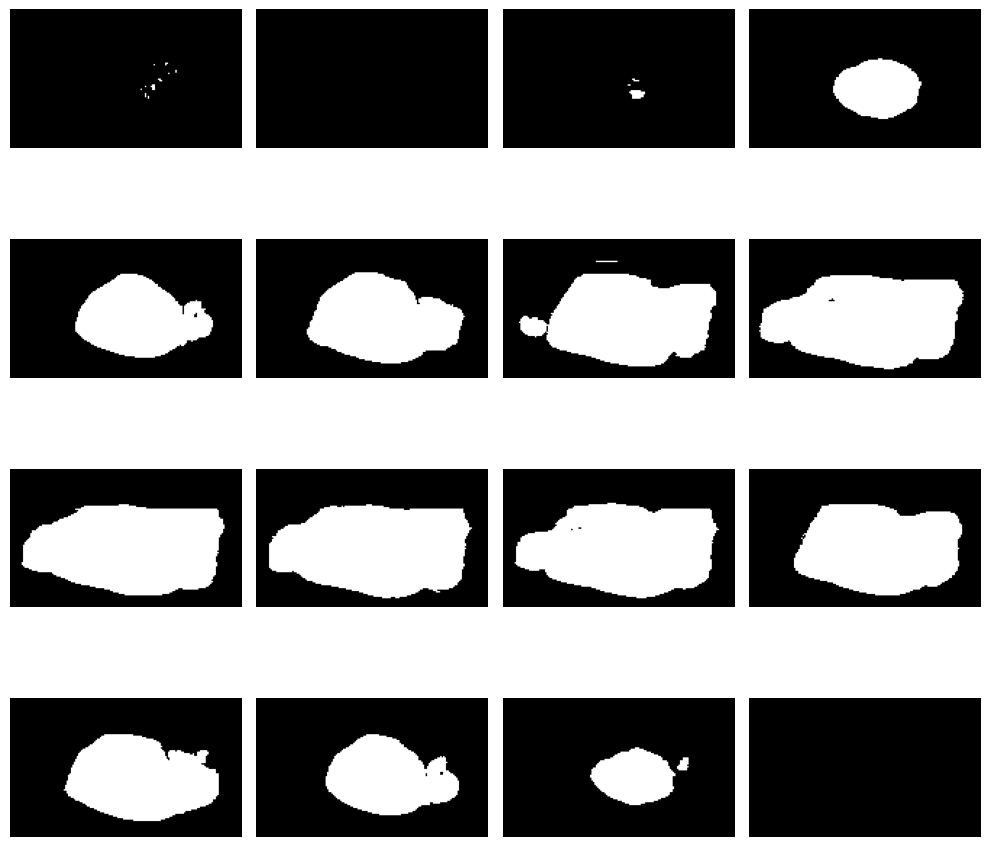

In [22]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = mask_before.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(mask_before[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

In [8]:
header = mask_img.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.70710677
quatern_c       : -2.1648903e-17
quatern_d       : 2.1648903e-17
qoffset_x       : -7.397624
qoffset_y       : -4.417459
qoffset_z       : 7.382423


In [10]:
header['extents'] = raw_img.header['extents']
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.70710677
quatern_c       : -2.1648903e-17
quatern_d       : 2.1648903e-17
qoffset_x       : -7.397624
qoffset_y       : -4.417459
qoffset_z       : 7.382

In [11]:
header['dim_info'] = raw_img.header['dim_info']
header['slice_end'] = raw_img.header['slice_end']
header['cal_max'] = raw_img.header['cal_max']
header['cal_min'] = raw_img.header['cal_min']
header['glmax'] = raw_img.header['glmax']
header['glmin'] = raw_img.header['glmin']

srow_x = raw_img.header['srow_x']
srow_y = raw_img.header['srow_y']
srow_z = raw_img.header['srow_z']


header['srow_x'] = srow_x
header['srow_y'] = srow_y
header['srow_z'] = srow_z

In [12]:
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 7.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.70710677
quatern_c       : -2.1648903e-17
quatern_d       : 2.1648903e-17
qoffset_x       : -7.397624
qoffset_y       : -4.417459
qoffset_

In [13]:
# create new dimensions
new_affine = np.eye(4)
new_affine[0, :] = header['srow_x']
new_affine[1, :] = header['srow_y']
new_affine[2, :] = header['srow_z']

new_affine

array([[  1.        ,   0.        ,   0.        , -67.38439178],
       [  0.        ,  -0.99280858,   0.11971229,  56.40406036],
       [  0.        ,  -0.11971223,  -0.99280858,  16.70816803],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [14]:
updated_mask_img = nib.Nifti1Image(mask_img.get_fdata(), new_affine, header)

In [15]:
print(updated_mask_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 7.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.70710677
quatern_c       : -2.1648903e-17
quatern_d       : 2.1648903e-17
qoffset_x       : -7.397624
qoffset_y       : -4.417459
qoffset_

In [16]:
nib.save(updated_mask_img, 'new_mask_for_169.nii')

In [18]:
new_mas_img = updated_mask_img.get_fdata()

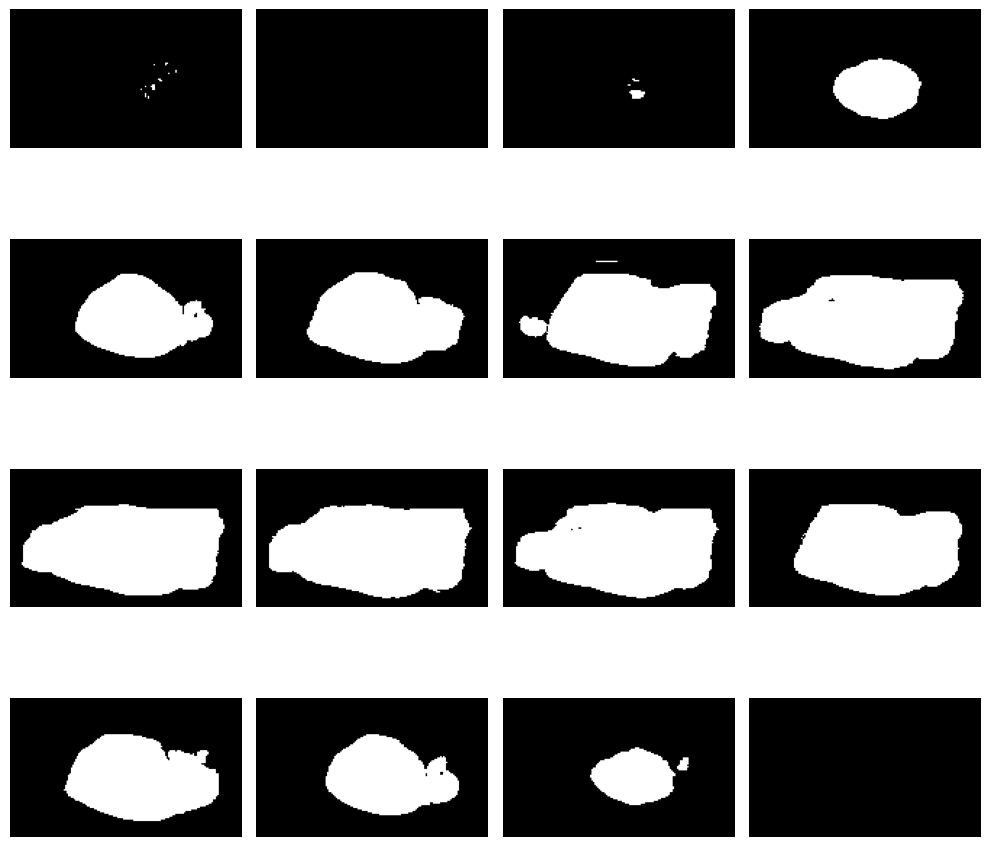

In [19]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = new_mas_img.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(new_mas_img[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()